Saving drug200.csv to drug200.csv
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Decision Tree Classification Report

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Random Forest Classification Report

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy       

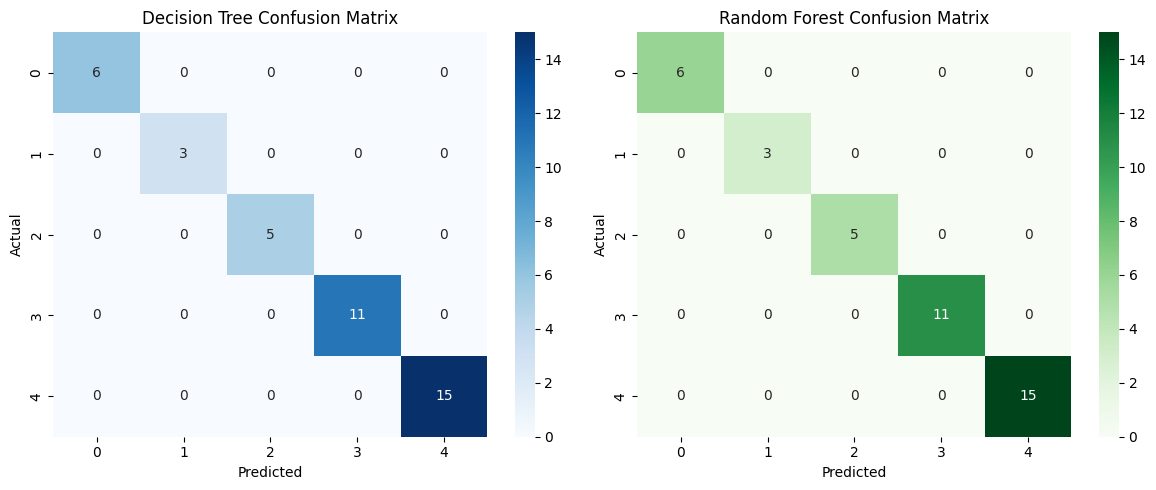

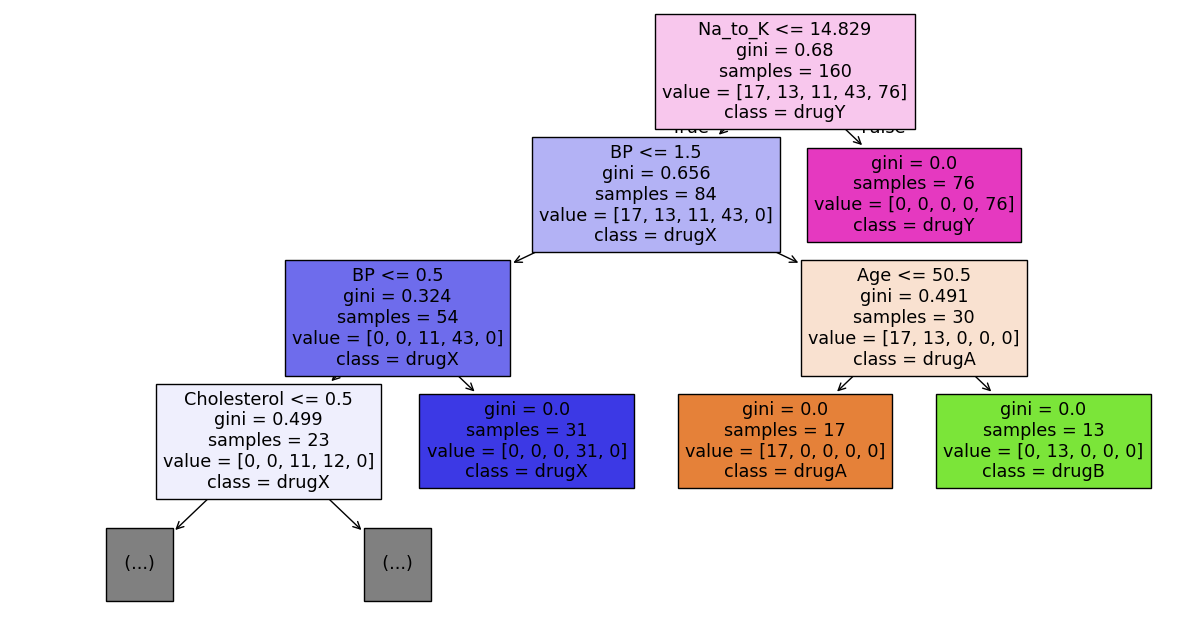

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["BP"] = df["BP"].map({"LOW": 0, "NORMAL": 1, "HIGH": 2})
df["Cholesterol"] = df["Cholesterol"].map({"NORMAL": 0, "HIGH": 1})

X = df.drop("Drug", axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

print("\nDecision Tree Classification Report\n")
print(classification_report(y_test, dt_pred))

print("\nRandom Forest Classification Report\n")
print(classification_report(y_test, rf_pred))

cm_dt = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    filled=True,
    max_depth=3
)
plt.show()